In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import choice

C:\Users\long\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\long\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\long\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Unsupervised Learning - K-means

Now we move to the unsupervised setting, that is, where we no longer have labels for our data. In the previous section we had our data as X, which had corresponding labels Y, that we used in our algorithm to aid convergence. This is reasonable in a lot of cases, but it is very common that we don't know these labels, e.g. we have taken certain measurements of animals that have 2 possible species, but are visually indistinguable. Suppose they do differ however in height and width, which we can measure. It would be desirable to classify each datapoint into one of the two species classes, but unlike last time, we don't have the labels to train our model.

So, we turn to k-means, an unsupervised method that aims to divide our data into k 'clusters'. In our case k=2. Let's generate some new data.

<function matplotlib.pyplot.show(close=None, block=None)>

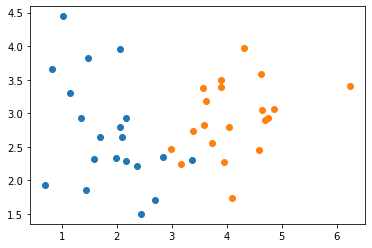

In [2]:
xsA=np.random.normal(2, 0.5, 20)
ysA=np.random.normal(3, 1, 20)

xsB=np.random.normal(4, 0.8, 20)
ysB=np.random.normal(3, 0.5, 20)

plt.scatter(xsA, ysA)
plt.scatter(xsB, ysB)

plt.show

We know these are two separate sets of data, as well as their mean and variance, because we generated them. What if we didn't know these things and needed to separate the data?

<function matplotlib.pyplot.show(close=None, block=None)>

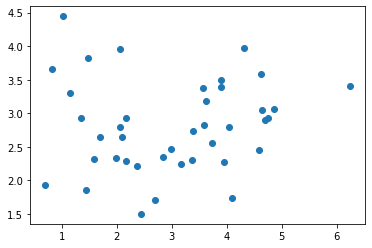

In [3]:
xs=np.concatenate((xsA,xsB))
ys=np.concatenate((ysA,ysB))

plt.scatter(xs,ys)
plt.show

One way to go about it is to put them in two "clusters". For our algorithm, we first need to randomly pick two centers for our clusters.

In [4]:
x1=choice(xsA)
y1=choice(ysA)

x2=choice(xsB)
y2=choice(ysB)

Then, we need to check for each point which cluster it is closer to.

(array([1.98636077, 1.69783781, 2.36213678, 1.44499141, 0.7015843 ,
        3.36410275, 2.44739048, 1.58092872, 2.70186015, 2.17018118,
        2.10210034, 2.8395448 , 4.0995211 , 2.98861104, 3.16664618]),
 array([2.33558845, 2.65213803, 2.21533236, 1.86130598, 1.92730819,
        2.30612366, 1.50142101, 2.31435309, 1.71280874, 2.29168105,
        2.64305229, 2.35005731, 1.74134807, 2.47472156, 2.24470102]),
 array([2.16942339, 1.48459985, 0.81249111, 1.01296373, 1.35068603,
        2.05810406, 1.14064736, 2.06415133, 4.03368121, 4.64680181,
        4.70194595, 4.30455596, 3.94342079, 3.58411952, 3.55957591,
        4.84991121, 4.58775356, 4.6251713 , 3.90228021, 3.61775359,
        4.75481624, 6.23536324, 3.73058962, 3.89542158, 3.39183954]),
 array([2.93592079, 3.82972237, 3.66036955, 4.44478518, 2.92350041,
        2.79182791, 3.30178454, 3.95847939, 2.79459511, 3.05306512,
        2.90131701, 3.9690238 , 2.27670019, 2.81984591, 3.37931892,
        3.06911023, 2.45368501, 3.58881108

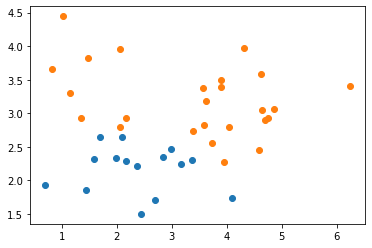

In [5]:
import math

def distance(x1,y1,x2,y2):
    return math.sqrt((x1-x2)**2+(y1-y2)**2)

def findclusters(xs,ys,x1,y1,x2,y2):
    Axs=np.array([])
    Ays=np.array([])
    Bxs=np.array([])
    Bys=np.array([])

    for i in range(len(xs)):
        if distance(xs[i],ys[i],x1,y1)<distance(xs[i],ys[i],x2,y2):
            Axs=np.append(Axs,xs[i])
            Ays=np.append(Ays,ys[i])
        else:
            Bxs=np.append(Bxs,xs[i])
            Bys=np.append(Bys,ys[i])

    plt.scatter(Axs,Ays)
    plt.scatter(Bxs,Bys)
    plt.show
    return(Axs,Ays,Bxs,Bys)
    
findclusters(xs,ys,x1,y1,x2,y2)

Once we've done this for all points we need to recalculate the cluster centers. We do that by taking the average x and y coordinates of each of the two lists

In [6]:
def average(xs,ys):
    x=sum(xs)/len(xs)
    y=sum(ys)/len(ys)
    return x,y
print(average(xs,ys))

(3.002796647998237, 2.8105077867211814)


We notice the as we run this, it gives better and better results. Congrats! You now know how to do a fundamental data processing algorithm!

In [7]:
def kmeans(i,xs,ys,x1,y1,x2,y2):
    for j in range(i):
        Axs,Ays,Bxs,Bys=findclusters(xs,ys,x1,y1,x2,y2)
        x1,y1=average(Axs,Ays)
        x2,y2=average(Bxs,Bys)

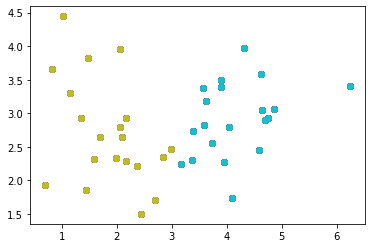

In [8]:
i=100
kmeans(i,xs,ys,x1,y1,x2,y2)